In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf

In [5]:
with open("/content/drive/MyDrive/time_series/SOH/Combined_LabelledData_18_역률평균.json", "r", encoding="utf-8") as f:
    content = f.read()
    json_data = json.loads(content)

In [6]:
print(type(json_data))

<class 'dict'>


In [7]:
print(json_data['data'][0])

{'ITEM_NAME': '누적전력량', 'ITEM_VALUE': 838462, 'TIMESTAMP': '2020-09-16 00:00:00', 'LABEL_NAME': '주의'}


In [8]:
for_soh = json_data['data'][:]

In [18]:
all_data = []
for i in for_soh:
  if i['ITEM_NAME'] == '역률평균':
    all_data.append(i)

In [19]:
pd_all_data = pd.DataFrame(all_data)

In [20]:
labels = pd_all_data.values[:, -1].tolist()
print(len(labels))

53280


In [21]:
print(len(pd_all_data))

53280


In [16]:
labels = labels[:5000]
pd_all_data[:5000]

,ITEM_NAME,ITEM_VALUE,TIMESTAMP,LABEL_NAME
0,역률평균,0.676,2020-09-16 00:00:00,주의
1,역률평균,0.674,2020-09-16 00:01:00,주의
2,역률평균,0.675,2020-09-16 00:02:00,주의
3,역률평균,0.677,2020-09-16 00:03:00,주의
4,역률평균,0.674,2020-09-16 00:04:00,주의
...,...,...,...,...
4995,역률평균,0.669,2020-09-19 11:15:00,주의
4996,역률평균,0.669,2020-09-19 11:16:00,주의
4997,역률평균,0.667,2020-09-19 11:17:00,주의
4998,역률평균,0.666,2020-09-19 11:18:00,주의


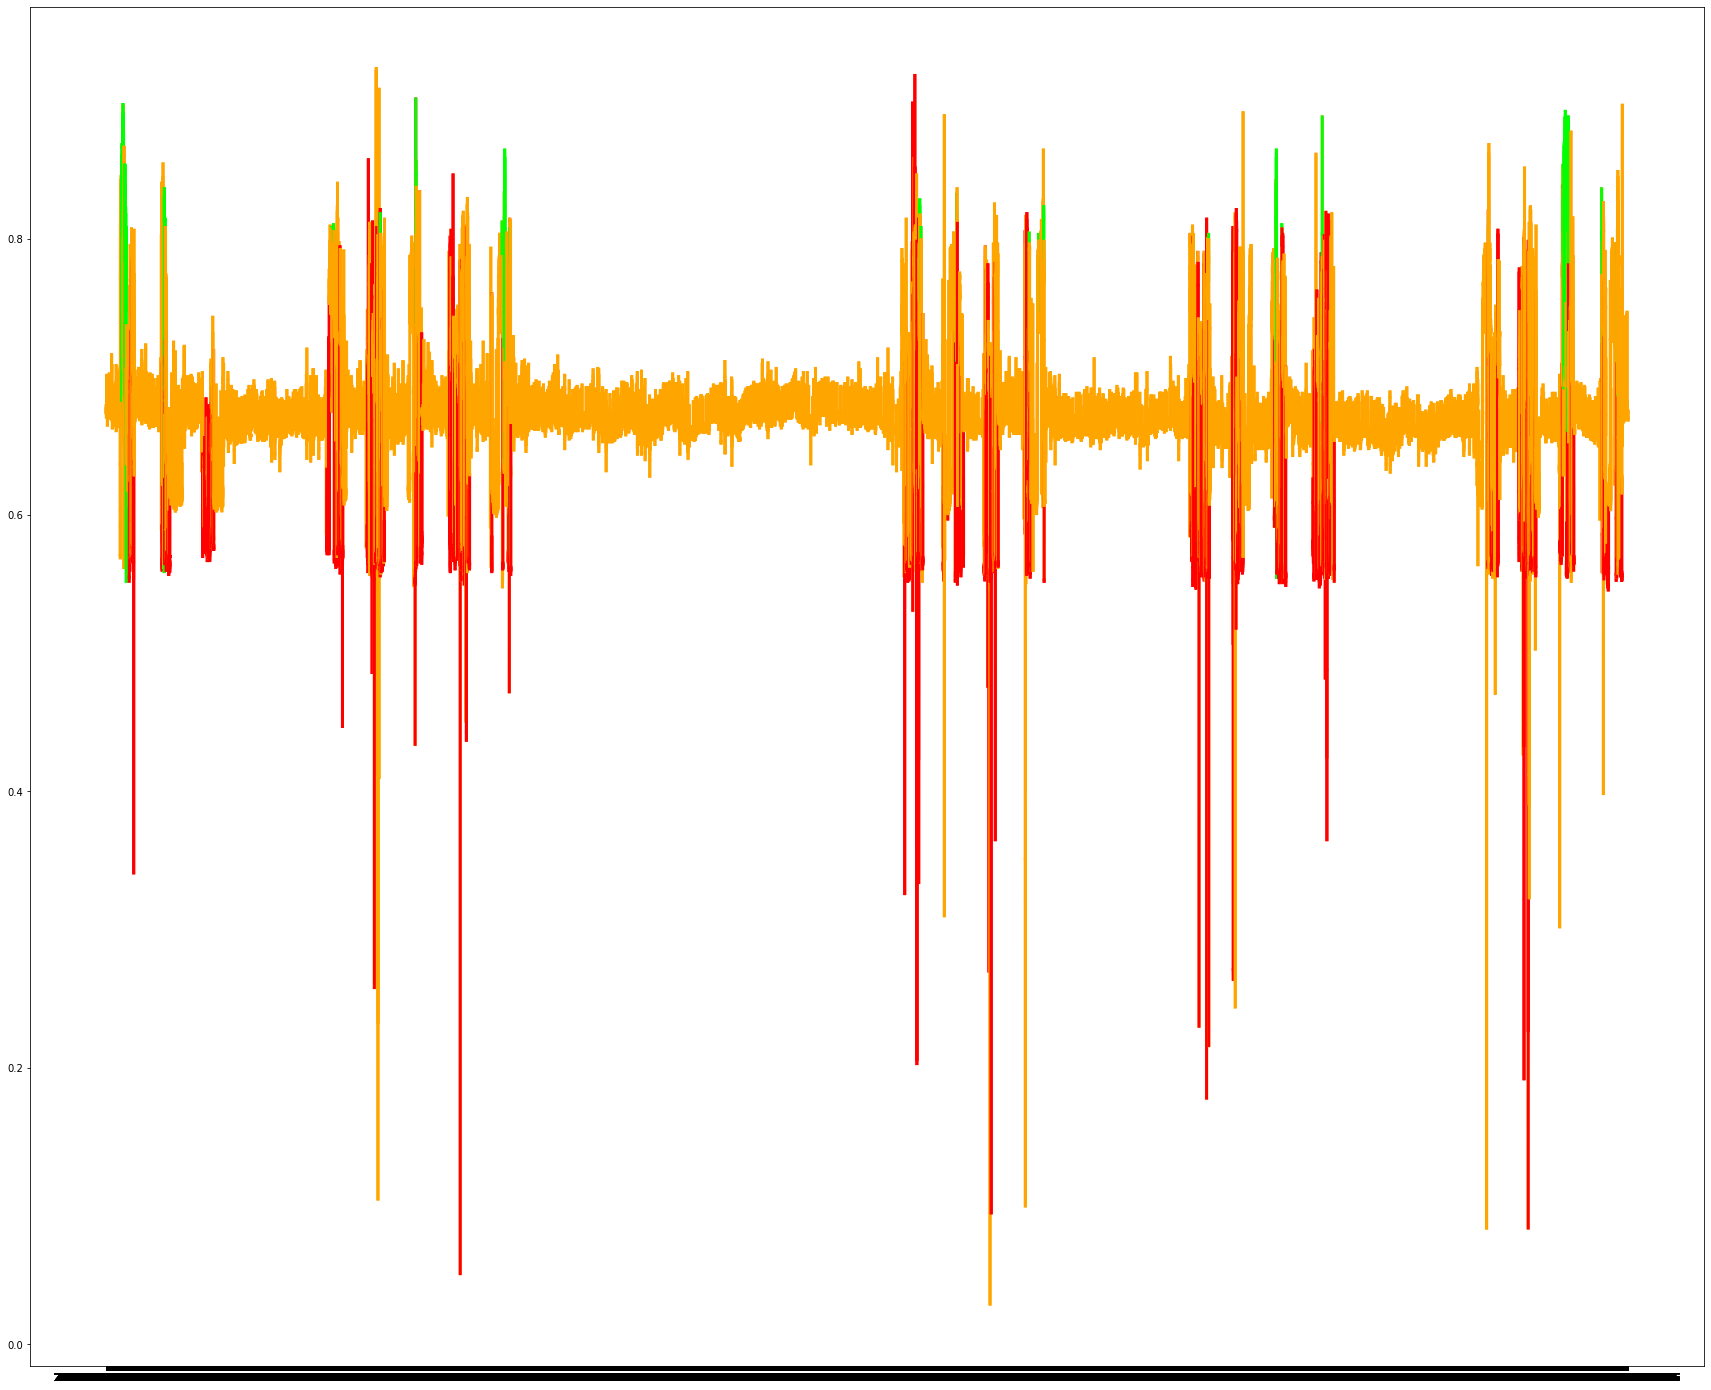

In [24]:
%matplotlib inline
color = ["#FF0000", "#00FF00", "#FFA500"]
c_count = 0

plt.figure(figsize=(30,25))
for i in range(len(pd_all_data) - 1):
  if labels[i] == '정상':
    c = color[1]
  elif labels[i] == '주의':
    c = color[2]
  else:
    c = color[0]
  
  plt.plot([pd_all_data['TIMESTAMP'][i], pd_all_data['TIMESTAMP'][i+1]], [pd_all_data['ITEM_VALUE'][i], pd_all_data['ITEM_VALUE'][i+1]], c = c, lw=3)

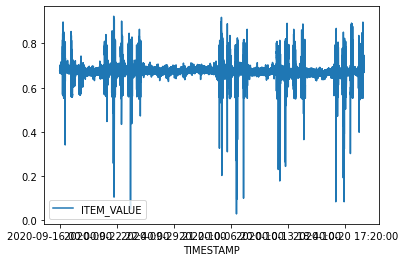

In [26]:
#plt.figure(figsize=(15,10))
#plt.plot()

pd_all_data.plot(x='TIMESTAMP', y='ITEM_VALUE')

In [8]:
normal_data = []
for i in for_soh:
  if i['ITEM_NAME'] == '역률평균' and i['LABEL_NAME'] == '정상':
    normal_data.append(i)

In [9]:
pd_normal_data = pd.DataFrame(normal_data)
pd_normal_data

,ITEM_NAME,ITEM_VALUE,TIMESTAMP,LABEL_NAME
0,역률평균,0.856000,2020-09-16 09:00:00,정상
1,역률평균,0.841000,2020-09-16 09:01:00,정상
2,역률평균,0.817000,2020-09-16 09:02:00,정상
3,역률평균,0.855000,2020-09-16 09:03:00,정상
4,역률평균,0.793000,2020-09-16 09:04:00,정상
...,...,...,...,...
375,역률평균,0.795148,2020-10-22 17:55:56,정상
376,역률평균,0.805524,2020-10-22 17:56:56,정상
377,역률평균,0.803703,2020-10-22 17:57:56,정상
378,역률평균,0.809855,2020-10-22 17:58:56,정상


In [35]:
X = np.linspace(0, 1, 11)
y_ = np.random.uniform(size=11)
y = np.cumsum(y_)
label = ["정상"] * 3 + ["주의"] * 4 + ["경고"] * 4

df = pd.DataFrame({"x":x, "y":y, "label":label})
df

,x,y,label
0,0.0,0.130437,정상
1,0.1,0.527824,정상
2,0.2,1.340008,정상
3,0.3,2.274838,주의
4,0.4,2.480711,주의
5,0.5,2.922914,주의
6,0.6,3.772813,주의
7,0.7,3.925148,경고
8,0.8,4.074407,경고
9,0.9,4.686928,경고


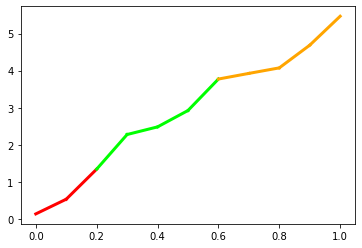

In [36]:
%matplotlib inline
color = ["#FF0000", "#00FF00", "#FFA500"]
c_count = 0
for i in range(len(X) - 1):
  if label[i] != label[i + 1]:
    c_count += 1
  plt.plot([x[i], x[i+1]], [y[i], y[i+1]], c=color[c_count], lw=3)


In [ ]:
color = ["#FF0000", "#00FF00", "#0000FF"]
c_count = 0
for i in range(len(pd_normal_data) - 1):
  if label


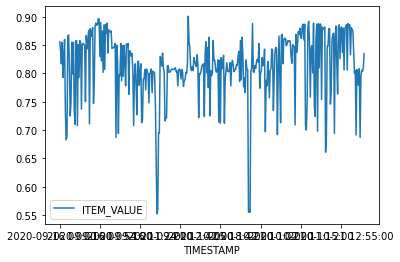

In [17]:
pd_normal_data.plot(x='TIMESTAMP', y='ITEM_VALUE')

In [10]:
pd_normal_data_array = pd_normal_data.values

In [11]:
labels = pd_normal_data_array[:,-1]

In [12]:
print(len(labels))

380


In [13]:
pd_normal_data.values

array([['역률평균', 0.856, '2020-09-16 09:00:00', '정상'],
       ['역률평균', 0.841, '2020-09-16 09:01:00', '정상'],
       ['역률평균', 0.817, '2020-09-16 09:02:00', '정상'],
       ...,
       ['역률평균', 0.803703, '2020-10-22 17:57:56', '정상'],
       ['역률평균', 0.809855, '2020-10-22 17:58:56', '정상'],
       ['역률평균', 0.834871, '2020-10-22 17:59:56', '정상']], dtype=object)

In [ ]:
pd_normal_data_preprocessed = 

In [ ]:
for_making_dataframe_list = []
for i in for_soh:
  if i['ITEM_NAME'] == '역률평균':
    for_making_dataframe_list.append(i)

In [ ]:
for_making_split = []
for i in pd_list:
  if i['LABEL_NAME'] == '정상':
    for_making_split.append(i)

In [ ]:
pd_list = pd.DataFrame(for_making_dataframe_list)

In [ ]:
pd_list

,ITEM_NAME,ITEM_VALUE,TIMESTAMP,LABEL_NAME
0,역률평균,0.676000,2020-09-16 00:00:00,주의
1,역률평균,0.674000,2020-09-16 00:01:00,주의
2,역률평균,0.675000,2020-09-16 00:02:00,주의
3,역률평균,0.677000,2020-09-16 00:03:00,주의
4,역률평균,0.674000,2020-09-16 00:04:00,주의
...,...,...,...,...
53275,역률평균,0.669112,2020-10-22 23:55:56,주의
53276,역률평균,0.670384,2020-10-22 23:56:56,주의
53277,역률평균,0.671791,2020-10-22 23:57:56,주의
53278,역률평균,0.668714,2020-10-22 23:58:56,주의


# 1. 전처리

1. ITEM VALUE와 LABEL_NAME만 남겨봅시다.

2. 일단 실험을 해봅시다, 정상 == 1 주의 && 경고 == 0 으로 하고 bool값으로 만들어서 ECG와 같은 형태로 돌려봅시다

In [ ]:
pd_list.shape

(53280, 4)

3. 정상만 있는 애를 뽑아봅시다

In [ ]:
for_making_split = []
for i in pd_list:
  if i['LABEL_NAME'] == '정상':
    for_making_split.append(i)

TypeError: ignored